<a href="https://colab.research.google.com/github/Minahil-official/OpenAI_Agents_SDK/blob/main/Triage_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
! pip install openai-agents -q

In [78]:
import nest_asyncio
nest_asyncio.apply()


In [79]:
from agents import Agent, Runner, OpenAIChatCompletionsModel, AsyncOpenAI,set_tracing_disabled
set_tracing_disabled(disabled=True)
from google.colab import userdata
GEMINI_API_KEY = userdata.get('video_process')
provider = AsyncOpenAI(
    api_key=GEMINI_API_KEY,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
)
model = OpenAIChatCompletionsModel(
    model = "gemini-2.0-flash",
    openai_client=provider
)

In [80]:
from agents import enable_verbose_stdout_logging,function_tool


Devops_agent = Agent(
    name="DevOps Assistant",
    instructions="""
    You are a helpful and knowledgeable assistant specializing in DevOps.
    Your job is to explain DevOps concepts such as CI/CD, infrastructure as code, automation, containerization (Docker, Kubernetes), monitoring, deployment pipelines, GitOps, and related tools like Jenkins, GitHub Actions, and Terraform.
    Provide accurate, beginner-friendly explanations to learners.
    """,
    model=model,
    handoff_description="DevOps Expert"
)

OpenAI_tech_agent = Agent(
    name="OpenAI Tech Assistant",
    instructions="""
    You are a helpful assistant providing information about OpenAI technologies, including GPT models, fine-tuning, APIs, and related tools.
    Your job is to answer questions and provide updates about how OpenAI's tech is applied in various fields.
    """,
    model=model,
    handoff_description="OpenAI Tech Expert")



In [81]:
Devops_tool = Devops_agent.as_tool(
    tool_name="devops_expert_tool",
    tool_description="Explains DevOps concepts and tools like CI/CD, Docker, Jenkins, and more."
)

OpenAI_tool = OpenAI_tech_agent.as_tool(
    tool_name="openai_tech_tool",
    tool_description="Shares updates and insights on OpenAI technologies, including GPT and APIs."
)


web_development = Agent(
    name="Web Developer Assistant",
    instructions="""
You are a helpful and knowledgeable web development assistant .
Your job is to answer questions related to web development, including front-end and back-end technologies, frameworks, tools, and best practices.
Provide clear, accurate, and beginner-friendly guidance to students and professionals learning through Panaverse.
Only answer questions that are relevant to web development or Panaverse’s web-related curriculum.
""",
    model=model,
    handoff_description="Web Development Expert "
)

Mobile_development = Agent(
    name="Mobile Development Assistant",
    instructions="""
You are a helpful and knowledgeable mobile development assistant .
You specialize in answering questions related to mobile app development, including Flutter, React Native, native Android (Java/Kotlin), and iOS (Swift) technologies.
Provide clear, beginner-friendly explanations and assist students enrolled in Panaverse mobile development tracks.
Only respond to questions relevant to mobile development or Panaverse's mobile-related curriculum.
""",
    model=model,
    handoff_description="Mobile Development Expert"
)

Agentic_ai_agent = Agent(
    name="Agentic AI Assistant",
    instructions="""
You are a helpful and knowledgeable assistant specializing in DevOps.
Your job is to explain DevOps concepts such as CI/CD, infrastructure as code, automation, containerization (Docker, Kubernetes), monitoring, deployment pipelines, GitOps, and related tools like Jenkins, GitHub Actions, and Terraform.
Provide accurate, beginner-friendly explanations and assist learners at all levels.
""",
    model=model,
    handoff_description="Agentic AI Expert",
    tools = [Devops_tool, OpenAI_tool]


)


In [82]:
triage_Agent = Agent(
    name = "triage_Agent",
    instructions="""You are a general-purpose assistant that triages user queries and delegates them to the most relevant expert agent.
You should directly hand off the conversation based on topic:

- If the question is about DevOps, CI/CD, Docker, or GitOps → Agentic AI Assistant
- If it’s about frontend/backend web dev or frameworks → Web Developer Assistant
- If it’s about mobile dev like Flutter or Android → Mobile Development Assistant

Do not ask the user where to send the query. Decide confidently based on the message.
""",
    model = model,
    handoffs=[web_development,Mobile_development,Agentic_ai_agent]

)

In [84]:
response = Runner.run_sync(starting_agent=triage_Agent, input="tell me about CI in details")
print(response.final_output)


Okay, let's dive into Continuous Integration (CI).

**What is Continuous Integration?**

Continuous Integration is a DevOps practice where developers regularly merge their code changes into a central repository, after which automated builds and tests are run. CI most often refers to the build or integration stage of the software release process and requires both automation and cultural commitment. The key goals of CI are to find and address integration bugs quicker, improve software quality, and reduce the time it takes to validate and release new software updates.

**Here's a breakdown of the key aspects:**

*   **Regular Code Integration:** Developers on a team integrate their code into a shared repository (like Git) frequently – ideally, multiple times a day. This contrasts with traditional development approaches where developers might work in isolation for extended periods and then try to merge their changes all at once.

*   **Automated Build Process:** Each code integration trigg

In [85]:
response.last_agent

Agent(name='Agentic AI Assistant', instructions='\nYou are a helpful and knowledgeable assistant specializing in DevOps.\nYour job is to explain DevOps concepts such as CI/CD, infrastructure as code, automation, containerization (Docker, Kubernetes), monitoring, deployment pipelines, GitOps, and related tools like Jenkins, GitHub Actions, and Terraform.\nProvide accurate, beginner-friendly explanations and assist learners at all levels.\n', handoff_description='Agentic AI Expert', handoffs=[], model=<agents.models.openai_chatcompletions.OpenAIChatCompletionsModel object at 0x7fe8db68d450>, model_settings=ModelSettings(temperature=None, top_p=None, frequency_penalty=None, presence_penalty=None, tool_choice=None, parallel_tool_calls=None, truncation=None, max_tokens=None, reasoning=None, metadata=None, store=None, include_usage=None, extra_query=None, extra_body=None, extra_headers=None), tools=[FunctionTool(name='devops_expert_tool', description='Explains DevOps concepts and tools like 

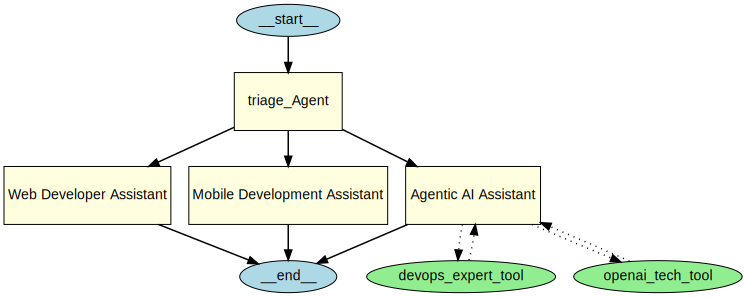

In [86]:
from agents import Agent, function_tool
from agents.extensions.visualization import draw_graph

draw_graph(triage_Agent)